In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from random import randint
from matplotlib import pyplot as plt

In [2]:
def get_full_data(X,y):
    y_full_mask = ~np.isnan(y)
    X=X[y_full_mask]
    y=y[y_full_mask]
    return X,y

In [3]:
# load data
df = pd.read_csv("dataset/steel_strength.csv")
# get dependent and independent features
X=df.iloc[:,1:-3]
y=df.iloc[:,-2]
X,y = get_full_data(X,y)


In [4]:
from sklearn.model_selection import RandomizedSearchCV
from common import XGB_search_params
from xgboost import XGBRegressor

r2_scoring = metrics.make_scorer(metrics.r2_score)

# for high-dimensional data use `gpu` for device if you have one
special_model = XGBRegressor(device='cpu',max_bin=1024)

params = XGB_search_params()
state = randint(0,1000)
search = RandomizedSearchCV(
    special_model,
    params,
    n_iter=500,
    cv=5,
    random_state=state,
    n_jobs=-1,
    scoring=r2_scoring
)
search.fit(X,y)
special_model=search.best_estimator_

In [5]:
# do repeated stratified k-fold cross-validation with classification report
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold, cross_val_score
def cross_val_score_mean_std(scores,name):
    print(f"-----------{name}-----------")
    print("Mean ",np.mean(scores))
    print("Std ",np.std(scores))

special_model.device='cpu'
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=50)

print("r2 scoring")
cross_val_score_mean_std(cross_val_score(special_model,X,y,cv=cv,scoring=r2_scoring),y.name)

r2 scoring
-----------tensile strength-----------
Mean  0.813374195334084
Std  0.08513826062138957


evaluate score  20022.068780819387


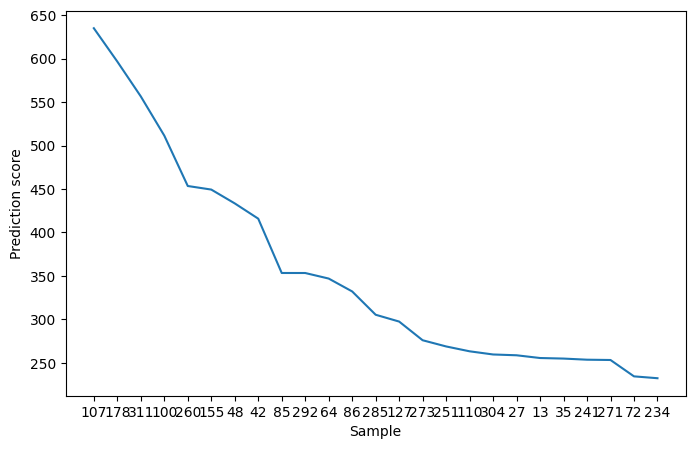

evaluate score  12921.947149770465


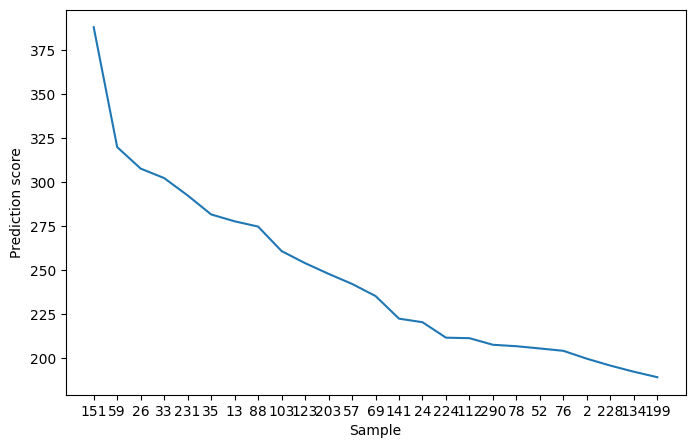

evaluate score  12460.67574780007


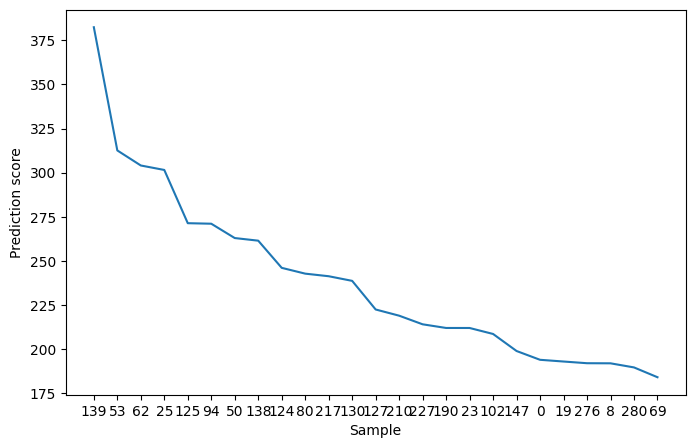

evaluate score  12362.859040605554


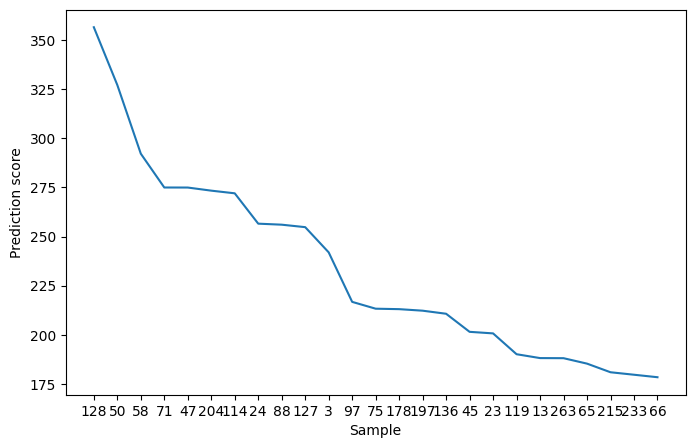

evaluate score  12901.899388757136
total removed  39


(array([107, 178, 311, 100, 260, 155,  48,  42,  85, 292,  64,  86, 285,
        273, 151,  59,  26,  33, 231,  35,  13, 103, 123, 203,  57,  69,
        141, 139,  53,  62,  25, 125,  94, 138, 124,  80, 217, 130, 210],
       dtype=int32),
 12901.899388757136)

In [6]:
from common import find_outliers


find_outliers(
    X.to_numpy(),
    y,
    special_model,
    outlier_remove_partition=0.05,
    evaluate_loss=metrics.mean_squared_error,
    plot=True
)

In [7]:
from gui_class import *
from xgboost import XGBRegressor

root = tk.Tk()

large_font = font.Font(family='Helvetica', size=20, weight='bold')

special_model = XGBRegressor(device='cpu',max_bin=1024)
main = MainWindow(root,special_model,large_font)   


root.mainloop()